In [2]:
import numpy as np
import mne
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = mne.io.read_raw_edf('./dataset/chb01/chb01_03.edf')

Extracting EDF parameters from ./dataset/chb01/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-3-b880fe760428>:1: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  data = mne.io.read_raw_edf('./dataset/chb01/chb01_03.edf')


In [5]:
data.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, ...
    chs : list | 23 items (EEG: 22, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : tuple | 1976-11-06 13:43:04 GMT
    nchan : int | 23
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    x

In [12]:
sub1 = data.get_data()

In [13]:
sub1.shape

(23, 921600)

In [20]:
df = pd.DataFrame(sub1[:,0:512])

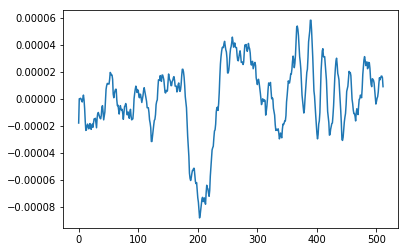

In [25]:
df.iloc[0,:].plot()

In [31]:
snippet = df.iloc[0,:]

In [30]:
def get_fft(snippet,Fs):
    #Fs = 128.0;  # sampling rate
    #Ts = len(snippet)/Fs/Fs; # sampling interval
    snippet_time = len(snippet)/Fs
    Ts = 1.0/Fs; # sampling interval
    t = np.arange(0,snippet_time,Ts) # time vector

    # ff = 5;   # frequency of the signal
    # y = np.sin(2*np.pi*ff*t)
    y = snippet
#     print('Ts: ',Ts)
#     print(t)
#     print(y.shape)
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range

    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    #Added in: (To remove bias.)
    #Y[0] = 0
    return frq,abs(Y)

In [33]:
frq,y = get_fft(snippet,256.0)

In [38]:
y

array([4.07509158e-07, 5.42851338e-06, 4.07032356e-06, 6.49505002e-06,
       8.76053537e-06, 9.03924172e-06, 3.56379207e-06, 2.19061917e-06,
       5.00151206e-06, 4.73065095e-07, 6.26423420e-07, 1.55985763e-06,
       1.83361637e-06, 1.65209916e-06, 1.85416570e-06, 1.16642582e-06,
       1.86904383e-06, 1.89537913e-06, 4.87624171e-07, 9.96025618e-07,
       1.87831994e-06, 2.18993803e-06, 2.82864223e-06, 2.49584868e-06,
       3.93785244e-06, 1.16972701e-06, 2.09103969e-06, 7.77467260e-07,
       1.21270147e-06, 5.23389122e-07, 5.53296577e-07, 7.17469692e-07,
       1.26858745e-06, 4.85330550e-07, 1.08175710e-07, 3.19195368e-07,
       7.33735622e-07, 5.32300040e-07, 1.30902085e-07, 5.19988880e-07,
       2.01614213e-07, 5.94359679e-07, 2.41716346e-07, 1.64435231e-07,
       2.70203486e-07, 2.62581043e-07, 1.69692845e-07, 4.01031552e-07,
       1.20020352e-07, 2.74263707e-07, 1.20486586e-07, 3.49716824e-07,
       3.34484907e-07, 2.08883469e-07, 1.76808505e-07, 1.02122079e-07,
      

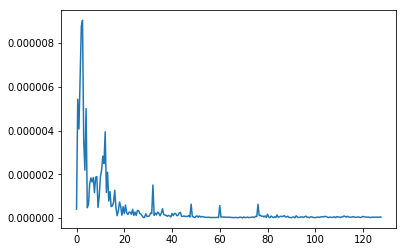

In [34]:
plt.plot(frq,y)